In [60]:
import pandas as pd

In [83]:
# %%
def load_price_timeseries(file: str) -> pd.Series:
    df = pd.read_csv(file)
    df.index = pd.to_datetime(df["Date"], format="%d/%m/%Y %H:%M")
    return df["Intraday Continuous 15 minutes ID1-Price"]  # * 1e-6 # €/MWh -> €/Wh


In [61]:
def calc_throughput(df):
    power = df["power_sim"]
    power_pos = power[power > 0].sum()
    power_neg = power[power < 0].sum()
    return (power_pos + power_neg) / 2 / 66e3

In [ ]:
def calc_revenue(res, price):
    df = res.join(price)
    return -1 * sum(df["power_sim"] * df["Intraday Continuous 15 minutes ID1-Price"]) * 0.25 * 1e-6  # W -> MWh

In [109]:
price = load_price_timeseries("data/intraday_prices/electricity_prices_germany_2019.csv")
# price.index.name = "time"

In [137]:
df_lp = pd.read_csv("results/2019 LP R=3.0 FEC=1.0.csv", index_col=0, parse_dates=True)
df_nl = pd.read_csv("results/2019 NL R=3.0 FEC=1.0.csv", index_col=0, parse_dates=True)

In [138]:
df_lp.loc[df_lp["power_sim"] > 100e3, "power_sim"] = 100e3
df_nl.loc[df_nl["power_sim"] > 100e3, "power_sim"] = 100e3

In [140]:
df_lp.min()

soc_opt            -1.110223e-16
soc_sim             0.000000e+00
power_opt          -1.000000e+05
power_sim          -1.000000e+05
converter_losses    0.000000e+00
battery_losses      0.000000e+00
dtype: float64

In [141]:
fec_lp = calc_throughput(df_lp)
fec_nl = calc_throughput(df_nl)
print(f"{fec_lp=:.1f}")
print(f"{fec_nl=:.1f} ({fec_nl/fec_lp - 1:+.2%})")

fec_lp=41.2
fec_nl=33.8 (-17.93%)


In [142]:
rev_lp = calc_revenue(df_lp, price)
rev_nl = calc_revenue(df_nl, price)
print(f"{rev_lp=:.1f} €")
print(f"{rev_nl=:.1f} € ({rev_nl/rev_lp - 1:+.2%})")

rev_lp=600.1 €
rev_nl=604.0 € (+0.64%)


np.int64(30392)

In [145]:
df_lp.iloc[(df_lp["power_sim"] / df_lp["power_opt"]).argmax()]

soc_opt                  0.398724
soc_sim                  0.894432
power_opt               13.000000
power_sim           100000.000000
converter_losses      4506.293042
battery_losses       16309.391272
Name: 2019-11-13 14:00:00, dtype: float64

<Axes: xlabel='time'>

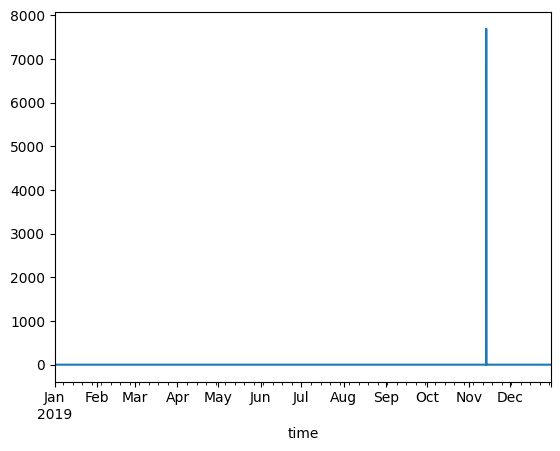

In [143]:
(df_lp["power_sim"] / df_lp["power_opt"]).fillna(1.0).plot()

<Axes: xlabel='time'>

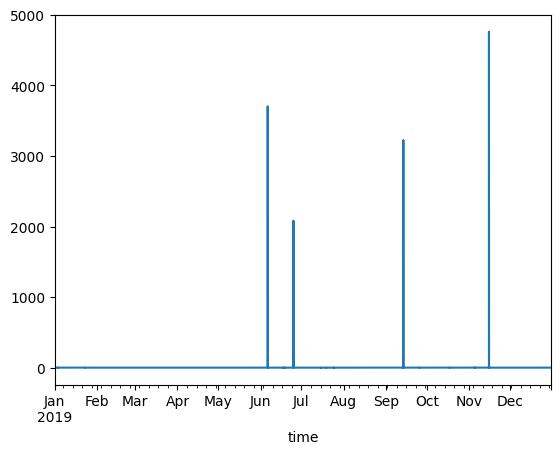

In [146]:
(df_nl["power_sim"] / df_nl["power_opt"]).fillna(1.0).plot()

In [147]:
df_nl.iloc[(df_nl["power_sim"] / df_nl["power_opt"]).argmax()]

soc_opt                  0.506855
soc_sim                  1.000000
power_opt               21.000000
power_sim           100000.000000
converter_losses      4490.305315
battery_losses       16489.874763
Name: 2019-11-15 14:00:00, dtype: float64

In [159]:
df_lp.iloc[(df_lp["power_sim"] / df_lp["power_opt"]).argmax()]

soc_opt                  0.398724
soc_sim                  0.894432
power_opt               13.000000
power_sim           100000.000000
converter_losses      4506.293042
battery_losses       16309.391272
Name: 2019-11-13 14:00:00, dtype: float64

<Axes: xlabel='time'>

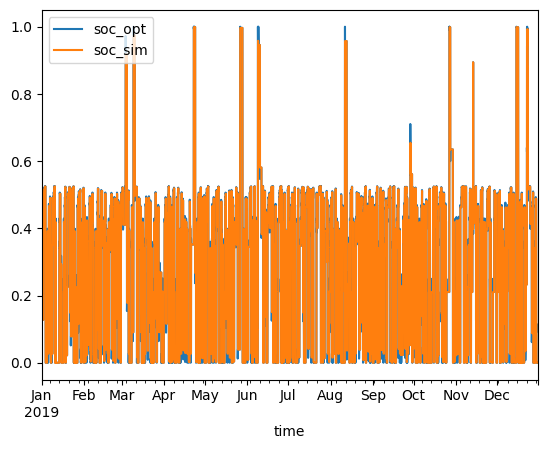

In [160]:
df_lp[["soc_opt", "soc_sim"]].plot()